# Applying pandas tips and tricks on titanic dataset
Author: Siraj Shabbir  
Date: 23/09/2023  
Email: sirajshabbir321@gmail.com

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
# reading the dataset
data = pd.read_csv("titanic.csv")
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 398.1 KB


In [5]:
data.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
# reversing the rows
data[::-1].head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True


In [10]:
# reversing the columns
data.iloc[:, ::-1].head()

,alone,alive,embark_town,deck,adult_male,who,class,embarked,fare,parch,sibsp,age,sex,pclass,survived
0,False,no,Southampton,NaN,True,man,Third,S,7.2500,0,1,22.0,male,3,0
1,False,yes,Cherbourg,C,False,woman,First,C,71.2833,0,1,38.0,female,1,1
2,True,yes,Southampton,NaN,False,woman,Third,S,7.9250,0,0,26.0,female,3,1
3,False,yes,Southampton,C,False,woman,First,S,53.1000,0,1,35.0,female,1,1
4,True,no,Southampton,NaN,True,man,Third,S,8.0500,0,0,35.0,male,3,0


In [11]:
# select by dtype
data.select_dtypes(include=['object']).head()

,sex,embarked,class,who,deck,embark_town,alive
0,male,S,Third,man,NaN,Southampton,no
1,female,C,First,woman,C,Cherbourg,yes
2,female,S,Third,woman,NaN,Southampton,yes
3,female,S,First,woman,C,Southampton,yes
4,male,S,Third,man,NaN,Southampton,no


In [16]:
# dividing data into random groups
group1 = data.sample(frac=0.5, random_state=1)
group1.shape

(446, 15)

In [15]:
group2 = data.drop(group1.index)
group2.shape

(445, 15)

In [17]:
# joining dataframes
pd.concat([group1, group2]).shape

(891, 15)

In [19]:
# filtering data
# people with age > 70
data[data['age'] > 70]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
96,0,1,male,71.0,0,0,34.6542,C,First,man,True,A,Cherbourg,no,True
116,0,3,male,70.5,0,0,7.7500,Q,Third,man,True,NaN,Queenstown,no,True
493,0,1,male,71.0,0,0,49.5042,C,First,man,True,NaN,Cherbourg,no,True
630,1,1,male,80.0,0,0,30.0000,S,First,man,True,A,Southampton,yes,True
851,0,3,male,74.0,0,0,7.7750,S,Third,man,True,NaN,Southampton,no,True


In [22]:
# selecting all male passengers
data[data.sex == 'male'].head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False


In [25]:
data.embark_town.unique()

array(['Southampton', 'Cherbourg', 'Queenstown', nan], dtype=object)

In [24]:
# selcting all passengers with embarked town as Queenstown or Southampton
data[data.embark_town.isin(['Queenstown', 'Southampton'])].head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True


In [27]:
# selcting top 5 oldest passengers
data.nlargest(5, 'age')

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
630,1,1,male,80.0,0,0,30.0000,S,First,man,True,A,Southampton,yes,True
851,0,3,male,74.0,0,0,7.7750,S,Third,man,True,NaN,Southampton,no,True
96,0,1,male,71.0,0,0,34.6542,C,First,man,True,A,Cherbourg,no,True
493,0,1,male,71.0,0,0,49.5042,C,First,man,True,NaN,Cherbourg,no,True
116,0,3,male,70.5,0,0,7.7500,Q,Third,man,True,NaN,Queenstown,no,True


In [28]:
# selcting top 5 youngest passengers
data.nsmallest(5, 'age')

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
803,1,3,male,0.42,0,1,8.5167,C,Third,child,False,NaN,Cherbourg,yes,False
755,1,2,male,0.67,1,1,14.5000,S,Second,child,False,NaN,Southampton,yes,False
469,1,3,female,0.75,2,1,19.2583,C,Third,child,False,NaN,Cherbourg,yes,False
644,1,3,female,0.75,2,1,19.2583,C,Third,child,False,NaN,Cherbourg,yes,False
78,1,2,male,0.83,0,2,29.0000,S,Second,child,False,NaN,Southampton,yes,False


In [37]:
# percentage of passengers from each embark town
data.embark_town.value_counts(normalize=True, dropna=False)  

embark_town
Southampton    0.722783
Cherbourg      0.188552
Queenstown     0.086420
NaN            0.002245
Name: proportion, dtype: float64

In [38]:
# add categories to age
data['age_cat'] = pd.cut(data.age, bins=[0, 18, 25, 35, 50, 65, 100], labels=['child', 'young adult', 'adult', 'middle age', 'senior', 'old'])
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_cat
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,young adult
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,middle age
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,adult
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,adult
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,adult


In [39]:
# encoding of sex
data["sex_encoded"] =  data.sex.map({
    "male": 0,
    "female": 1
})
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_cat,sex_encoded
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,young adult,0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,middle age,1
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,adult,1
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,adult,1
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,adult,0


In [40]:
# or
data["sex_encoded"] =  data.sex.factorize()[0]
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_cat,sex_encoded
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,young adult,0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,middle age,1
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,adult,1
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,adult,1
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,adult,0


In [45]:
# selecting columns
sub_data = data[["class", "age", "fare"]]
sub_data.head()

,class,age,fare
0,Third,22.0,7.2500
1,First,38.0,71.2833
2,Third,26.0,7.9250
3,First,35.0,53.1000
4,Third,35.0,8.0500


In [47]:
# wide to long
long_data = sub_data.melt(id_vars=['class'], value_vars=['age', 'fare'])
long_data.head()

,class,variable,value
0,Third,age,22.0
1,First,age,38.0
2,Third,age,26.0
3,First,age,35.0
4,Third,age,35.0


<Axes: xlabel='class', ylabel='value'>

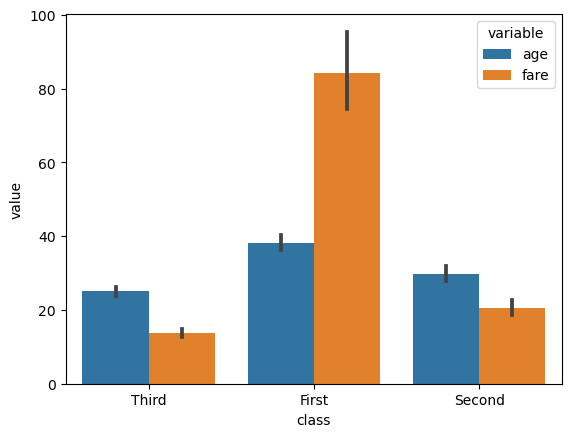

In [50]:
sns.barplot(x='class', y='value', hue='variable', data=long_data)